In [37]:
# Import necessary libraries
import numpy as np         # For numerical operations and arrays
import pandas as pd        # For data manipulation and analysis (DataFrames)
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns      # For statistical data visualization

# Set the number of threads for OpenMP (parallel computation in certain libraries)
# This helps control parallel processing in numerical libraries to optimize performance.
import os
os.environ["OMP_NUM_THREADS"] = "38"  # Set the number of threads for OpenMP to 38

# Set random seeds for reproducibility
# Ensures that the results are consistent across runs.
import random
np.random.seed(42)  # Set the seed for NumPy random number generator
random.seed(42)     # Set the seed for Python's random number generator

In [38]:

# Reading the Dataset from CSV File


# Read the CSV file into a Pandas DataFrame
# The file path specifies the location of the CSV file on the system.
df = pd.read_csv("C:\\Users\\acer\\Desktop\\Machine Learning\\Classification\\dataset2.csv")

# Print the DataFrame to display the contents
print(df)


        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0    

In [39]:

# Dropping Unnecessary Columns from the DataFrame


# Drop the specified columns ("UDI", "Product ID", and "Failure Type") from the DataFrame
# `columns = [...]` specifies the columns to be removed.
# `axis=1` indicates that columns (not rows) are being dropped.
df = df.drop(columns = (["UDI", "Product ID", "Failure Type"]), axis = 1)
# Displaying the DataFrame
print(df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                       1551         42.8                0       0  
1                       1408         46.3                3       0  
2                       1498         49.4                5       0  
3              

In [40]:

# Encoding Categorical Data with LabelEncoder
# Import LabelEncoder from scikit-learn
# LabelEncoder is used to convert categorical labels into numeric labels.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the first column of the DataFrame
# `df[df.columns[0]]` selects the first column of the DataFrame.
# `le.fit_transform()` fits the LabelEncoder to the data and transforms the categorical values into integers.
# The transformed values are assigned back to the first column of the DataFrame.
df[df.columns[0]] = le.fit_transform(df[df.columns[0]])
# Displaying the DataFrame
print(df)



      Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                       1551         42.8                0       0  
1                       1408         46.3                3       0  
2                       1498         49.4                5       0  
3  

In [41]:
# Filter the DataFrame to include only rows where the "Target" column has a value of 1
# This creates a new DataFrame `df_2` that contains all the rows with "Target" = 1.
df_2 = df[df["Target"] == 1]

# Print the resulting DataFrame `df_2` to inspect the rows where "Target" is 1
print(df_2)

# Filter the DataFrame to include only rows where the "Target" column has a value of 0
# This creates a new DataFrame `df_1` that contains all the rows with "Target" = 0.
df_1 = df[df["Target"] == 0]

# Print the resulting DataFrame `df_1` to inspect the rows where "Target" is 0
print(df_1)


      Type  Air temperature [K]  Process temperature [K]  \
50       1                298.9                    309.1   
69       1                298.9                    309.0   
77       1                298.8                    308.9   
160      1                298.4                    308.2   
161      1                298.3                    308.1   
...    ...                  ...                      ...   
9758     1                298.6                    309.8   
9764     1                298.5                    309.5   
9822     1                298.5                    309.4   
9830     1                298.3                    309.3   
9974     1                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
50                      2861          4.6              143       1  
69                      1410         65.7              191       1  
77                      1455         41.3              208       1  
160

In [42]:
# Import KMeans from scikit-learn
# KMeans is a clustering algorithm that groups data into 'n_clusters' based on similarities.
from sklearn.cluster import KMeans

# Initialize the KMeans model with the following parameters:
# n_clusters=20: Set the number of clusters to 20.
# n_init=10: The number of times the KMeans algorithm will be run with different initializations to avoid local minima.
# random_state=42: Ensures reproducibility by fixing the random seed.
kmeans = KMeans(n_clusters = 20, n_init = 10, random_state = 42)

# Fit the KMeans model on df_1 and predict the clusters
# `fit_predict()` trains the model on the data and assigns each data point to a cluster.
# The resulting cluster labels are stored in the variable `clusters`.
clusters = kmeans.fit_predict(df_1)

# Add the cluster labels as a new column "cluster" to df_1
# This allows us to associate each data point with its respective cluster.
df_1["cluster"] = clusters

# Print the updated DataFrame `df_1` to view the assigned cluster labels
print(df_1)

# Print the distribution of the clusters
# `value_counts()` shows the count of data points in each cluster.
print(df_1['cluster'].value_counts())

      Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  cluster  
0                       1551         42.8                0       0       17  
1                       1408         46.3                3       0       18  
2                       1498         49.4    

C:\Users\acer\AppData\Local\Temp\ipykernel_18292\4052367828.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["cluster"] = clusters


In [43]:
# Define a function `sample_from_clusters` to sample a fraction of data from each cluster
# `df`: The input DataFrame containing data.
# `cluster_col`: The column that contains cluster labels (e.g., "cluster").
# `sample_frac`: The fraction of data to sample from each cluster.
def sample_from_clusters(df, cluster_col, sample_frac):
    # Group the DataFrame by the cluster column (`cluster_col`) and sample the specified fraction (`sample_frac`) from each group.
    # `apply(lambda x: x.sample(frac=sample_frac))` samples a fraction of the data from each group.
    sampled_data = df.groupby(cluster_col).apply(lambda x: x.sample(frac=sample_frac))
    
    # Reset the index of the sampled data to ensure it's in a sequential order.
    # `drop=True` prevents the old index from being added as a column.
    sampled_data = sampled_data.reset_index(drop=True)
    
    # Return the sampled DataFrame.
    return sampled_data

# Apply the sampling function to `df_1`, sampling 5% of the data from each cluster.
sampled_df = sample_from_clusters(df_1, "cluster", 0.05)

# Drop the "cluster" column from the sampled data as it's no longer needed for further analysis.
sampled_df = sampled_df.drop(columns = "cluster", axis = 1)

# Print the sampled DataFrame to inspect the result.
print(sampled_df)


     Type  Air temperature [K]  Process temperature [K]  \
0       1                300.1                    309.2   
1       2                298.7                    309.7   
2       1                302.2                    310.8   
3       1                297.4                    308.3   
4       1                298.4                    308.8   
..    ...                  ...                      ...   
477     1                298.8                    308.3   
478     2                303.2                    311.2   
479     1                299.6                    309.1   
480     2                299.6                    310.1   
481     1                298.0                    308.0   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                      1326         55.9               55       0  
1                      1362         50.5               34       0  
2                      1350         56.6               76       0  
3                  

C:\Users\acer\AppData\Local\Temp\ipykernel_18292\1214055492.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = df.groupby(cluster_col).apply(lambda x: x.sample(frac=sample_frac))


In [44]:
# Concatenate `sampled_df` and `df_2` into a single DataFrame
# `pd.concat([sampled_df, df_2])` combines the two DataFrames vertically (by default along axis 0).
# This operation merges the rows of `sampled_df` and `df_2` into one DataFrame.
df = pd.concat([sampled_df, df_2])

# Print the concatenated DataFrame to inspect the result.
print(df)

      Type  Air temperature [K]  Process temperature [K]  \
0        1                300.1                    309.2   
1        2                298.7                    309.7   
2        1                302.2                    310.8   
3        1                297.4                    308.3   
4        1                298.4                    308.8   
...    ...                  ...                      ...   
9758     1                298.6                    309.8   
9764     1                298.5                    309.5   
9822     1                298.5                    309.4   
9830     1                298.3                    309.3   
9974     1                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                       1326         55.9               55       0  
1                       1362         50.5               34       0  
2                       1350         56.6               76       0  
3  

In [45]:
# Separate the features (X) and target variable (Y) from the DataFrame
# X contains all the columns except the last one (assumed to be the target).
# Y contains the last column, which is the target variable.
X = df.iloc[:, :-1].values   # All rows, all columns except the last one (features).
Y = df.iloc[:, -1].values    # All rows, only the last column (target).

# Import `train_test_split` from scikit-learn to split the data into training and test sets.
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (15% for testing, 85% for training).
# test_size=0.15 means that 15% of the data will be used for testing, and the rest (85%) for training.
# random_state=42 ensures that the split is reproducible.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# Further split the training data into training and validation sets (15% for validation, 70% for training).
# test_size=0.15 means 15% of the training data will be used for validation.
# random_state=42 ensures reproducibility of the split.
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

C:\Users\acer\AppData\Local\Temp\ipykernel_18292\430797152.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Failure', 'Failure'])


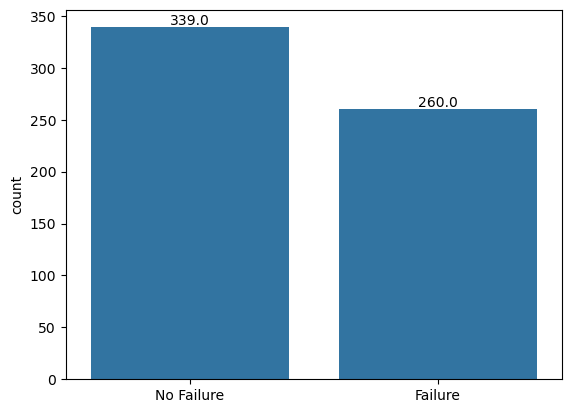

C:\Users\acer\AppData\Local\Temp\ipykernel_18292\430797152.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Failure', 'Failure'])


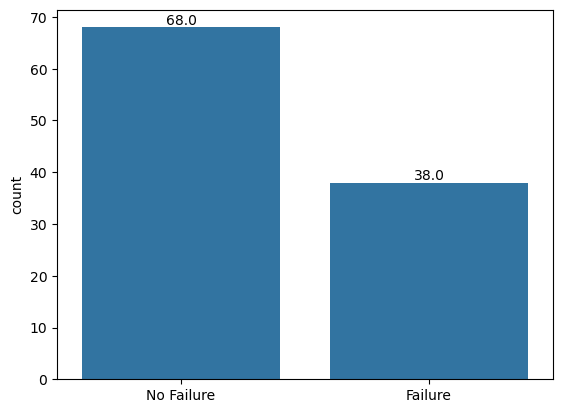

C:\Users\acer\AppData\Local\Temp\ipykernel_18292\430797152.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Failure', 'Failure'])


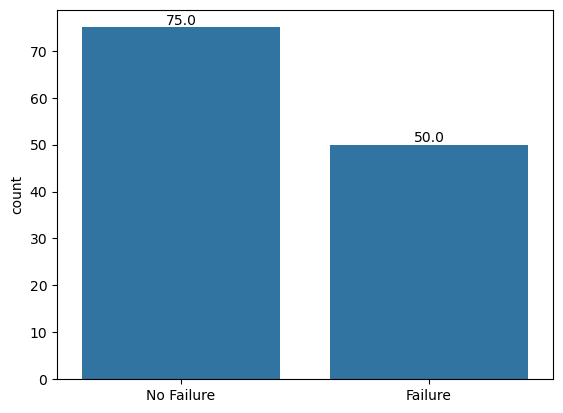

In [46]:
# Convert the target variables (Y_train, Y_val, Y_test) into DataFrames for easier visualization
train_data = pd.DataFrame(Y_train)
val_data = pd.DataFrame(Y_val)
test_data = pd.DataFrame(Y_test)

# Visualize the class distribution in the training set using a countplot
# `sns.countplot(data=train_data, x=Y_train)` creates a bar plot for the "Failure" and "No Failure" counts.
ax = sns.countplot(data=train_data, x=Y_train)

# Annotate each bar with its count to make the plot more informative
# `p.get_height()` gets the height of the bar (i.e., the count).
# `p.get_x() + p.get_width() / 2` calculates the position for the label at the center of each bar.
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom")

# Set custom labels for the x-axis ticks ('No Failure' and 'Failure')
ax.set_xticklabels(['No Failure', 'Failure'])

# Display the plot
plt.show()

# Repeat the above steps for the validation set
ax = sns.countplot(data=val_data, x=Y_val)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")
ax.set_xticklabels(['No Failure', 'Failure'])
plt.show()

# Repeat the same for the test set
ax = sns.countplot(data=test_data, x=Y_test)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")
ax.set_xticklabels(['No Failure', 'Failure'])
plt.show()


In [47]:
# Import StandardScaler from scikit-learn to scale the features
# Standardization ensures that features have zero mean and unit variance, which improves model performance.
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
SC = StandardScaler()

# Fit the scaler on the training data and transform the training features (scaling).
# `fit_transform(X_train)` computes the mean and standard deviation for scaling, and scales the data.
X_train_sc = SC.fit_transform(X_train)

# Transform the test data using the same scaler (using the parameters learned from the training set).
# `transform(X_test)` ensures the test data is scaled in the same way as the training data.
X_test_sc = SC.transform(X_test)

# Transform the validation data using the same scaler (using the parameters learned from the training set).
X_val_sc = SC.transform(X_val)

In [48]:
# Logistic Regression: A simple linear model for binary classification.
# `random_state=42` ensures reproducibility of the results.
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train_sc, Y_train)  # Fit the model to the scaled training data

# K-Nearest Neighbors (KNN): A non-parametric algorithm that classifies based on the closest neighbors.
# `n_neighbors=5` sets the number of neighbors to consider for classification.
from sklearn.neighbors import KNeighborsClassifier
K_NN = KNeighborsClassifier(n_neighbors=5)
K_NN.fit(X_train_sc, Y_train)  # Fit the KNN model to the scaled training data

# Support Vector Classifier (SVC): A linear kernel SVM model for binary classification.
# `kernel='linear'` specifies a linear decision boundary.
from sklearn.svm import SVC
svc = SVC(kernel="linear", random_state=42)
svc.fit(X_train_sc, Y_train)  # Fit the SVM model to the scaled training data

# Gaussian Naive Bayes: A probabilistic classifier that assumes the features follow a Gaussian distribution.
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train_sc, Y_train)  # Fit the Naive Bayes model to the scaled training data

# Random Forest Classifier: An ensemble of decision trees, trained using a subset of data.
# `n_estimators=10` sets the number of decision trees to 10.
# `criterion='entropy'` uses entropy to measure the quality of splits.
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=42)
RFC.fit(X_train_sc, Y_train)  # Fit the Random Forest model to the scaled training data

# Decision Tree Classifier: A model that splits data based on the best feature using entropy as a criterion.
# `criterion='entropy'` specifies the use of entropy for splitting.
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion="entropy", random_state=42)
DTC.fit(X_train_sc, Y_train)  # Fit the Decision Tree model to the scaled training data


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:
# Logistic Regression: Evaluate model on validation data using accuracy and confusion matrix.
Y_val_pred_logistic = logistic.predict(X_val_sc)  # Predict on the scaled validation data
accuracy_val_logistic = accuracy_score(Y_val, Y_val_pred_logistic)  # Calculate accuracy
print(f'Logistic Regression accuracy_score: {accuracy_val_logistic:.2f}')
cm_val_logistic = confusion_matrix(Y_val, Y_val_pred_logistic)  # Compute confusion matrix
print(f'Logistic Regression confusion_matrix:\n{cm_val_logistic}')

# K-Nearest Neighbors: Evaluate model on validation data using accuracy and confusion matrix.
Y_val_pred_K_NN = K_NN.predict(X_val_sc)  # Predict on the scaled validation data
accuracy_val_K_NN = accuracy_score(Y_val, Y_val_pred_K_NN)  # Calculate accuracy
print(f'K-Nearest Neighbors accuracy_score: {accuracy_val_K_NN:.2f}')
cm_val_K_NN = confusion_matrix(Y_val, Y_val_pred_K_NN)  # Compute confusion matrix
print(f'K-Nearest Neighbors confusion_matrix:\n{cm_val_K_NN}')

# Support Vector Classifier: Evaluate model on validation data using accuracy and confusion matrix.
Y_val_pred_svc = svc.predict(X_val_sc)  # Predict on the scaled validation data
accuracy_val_svc = accuracy_score(Y_val, Y_val_pred_svc)  # Calculate accuracy
print(f'Support Vector Machine accuracy_score: {accuracy_val_svc:.2f}')
cm_val_svc = confusion_matrix(Y_val, Y_val_pred_svc)  # Compute confusion matrix
print(f'Support Vector Machine confusion_matrix:\n{cm_val_svc}')

# Decision Tree Classifier: Evaluate model on validation data using accuracy and confusion matrix.
Y_val_pred_DTC = DTC.predict(X_val_sc)  # Predict on the scaled validation data
accuracy_val_DTC = accuracy_score(Y_val, Y_val_pred_DTC)  # Calculate accuracy
print(f'Decision Tree Classifier accuracy_score: {accuracy_val_DTC:.2f}')
cm_val_DTC = confusion_matrix(Y_val, Y_val_pred_DTC)  # Compute confusion matrix
print(f'Decision Tree Classifier confusion_matrix:\n{cm_val_DTC}')

# Random Forest Classifier: Evaluate model on validation data using accuracy and confusion matrix.
Y_val_pred_RFC = RFC.predict(X_val_sc)  # Predict on the scaled validation data
accuracy_val_RFC = accuracy_score(Y_val, Y_val_pred_RFC)  # Calculate accuracy
print(f'Random Forest Classifier accuracy_score: {accuracy_val_RFC:.2f}')
cm_val_RFC = confusion_matrix(Y_val, Y_val_pred_RFC)  # Compute confusion matrix
print(f'Random Forest Classifier confusion_matrix:\n{cm_val_RFC}')

# Naive Bayes: Evaluate model on validation data using accuracy and confusion matrix.
Y_val_pred_NB = NB.predict(X_val_sc)  # Predict on the scaled validation data
accuracy_val_NB = accuracy_score(Y_val, Y_val_pred_NB)  # Calculate accuracy
print(f'Naive Bayes accuracy_score: {accuracy_val_NB:.2f}')
cm_val_NB = confusion_matrix(Y_val, Y_val_pred_NB)  # Compute confusion matrix
print(f'Naive Bayes confusion_matrix:\n{cm_val_NB}')

NameError: name 'accuracy_score' is not defined

In [ ]:
# Logistic Regression: Evaluate model on test data using accuracy and confusion matrix.
Y_pred_logistic = logistic.predict(X_test_sc)  # Predict on the scaled test data
accuracy_logistic = accuracy_score(Y_test, Y_pred_logistic)  # Calculate accuracy
print(f'Logistic Regression accuracy_score: {accuracy_logistic:.2f}')
cm_logistic = confusion_matrix(Y_test, Y_pred_logistic)  # Compute confusion matrix
print(f'Logistic Regression confusion_matrix:\n{cm_logistic}')

# K-Nearest Neighbors: Evaluate model on test data using accuracy and confusion matrix.
Y_pred_K_NN = K_NN.predict(X_test_sc)  # Predict on the scaled test data
accuracy_K_NN = accuracy_score(Y_test, Y_pred_K_NN)  # Calculate accuracy
print(f'K-Nearest Neighbors accuracy_score: {accuracy_K_NN:.2f}')
cm_K_NN = confusion_matrix(Y_test, Y_pred_K_NN)  # Compute confusion matrix
print(f'K-Nearest Neighbors confusion_matrix:\n{cm_K_NN}')

# Support Vector Classifier: Evaluate model on test data using accuracy and confusion matrix.
Y_pred_svc = svc.predict(X_test_sc)  # Predict on the scaled test data
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)  # Calculate accuracy
print(f'Support Vector Machine accuracy_score: {accuracy_svc:.2f}')
cm_svc = confusion_matrix(Y_test, Y_pred_svc)  # Compute confusion matrix
print(f'Support Vector Machine confusion_matrix:\n{cm_svc}')

# Decision Tree Classifier: Evaluate model on test data using accuracy and confusion matrix.
Y_pred_DTC = DTC.predict(X_test_sc)  # Predict on the scaled test data
accuracy_DTC = accuracy_score(Y_test, Y_pred_DTC)  # Calculate accuracy
print(f'Decision Tree Classifier accuracy_score: {accuracy_DTC:.2f}')
cm_DTC = confusion_matrix(Y_test, Y_pred_DTC)  # Compute confusion matrix
print(f'Decision Tree Classifier confusion_matrix:\n{cm_DTC}')

# Random Forest Classifier: Evaluate model on test data using accuracy and confusion matrix.
Y_pred_RFC = RFC.predict(X_test_sc)  # Predict on the scaled test data
accuracy_RFC = accuracy_score(Y_test, Y_pred_RFC)  # Calculate accuracy
print(f'Random Forest Classifier accuracy_score: {accuracy_RFC:.2f}')
cm_RFC = confusion_matrix(Y_test, Y_pred_RFC)  # Compute confusion matrix
print(f'Random Forest Classifier confusion_matrix:\n{cm_RFC}')

# Naive Bayes: Evaluate model on test data using accuracy and confusion matrix.
Y_pred_NB = NB.predict(X_test_sc)  # Predict on the scaled test data
accuracy_NB = accuracy_score(Y_test, Y_pred_NB)  # Calculate accuracy
print(f'Naive Bayes accuracy_score: {accuracy_NB:.2f}')
cm_NB = confusion_matrix(Y_test, Y_pred_NB)  # Compute confusion matrix
print(f'Naive Bayes confusion_matrix:\n{cm_NB}')

In [ ]:
# Create dictionaries for validation and test accuracy data
validation_data = {
    "Model": [
        'Logistic Regression', 
        'K-Nearest Neighbors', 
        'Support Vector Machine', 
        'Naive Bayes', 
        'Random Forest Classification', 
        'Decision Tree Classification'
    ],
    "Accuracy": [0.80, 0.86, 0.81, 0.79, 0.85, 0.81]
}

test_data = {
    "Model": [
        'Logistic Regression', 
        'K-Nearest Neighbors', 
        'Support Vector Machine', 
        'Naive Bayes', 
        'Random Forest Classification', 
        'Decision Tree Classification'
    ],
    "Accuracy": [0.82, 0.90, 0.82, 0.85, 0.91, 0.89]
}

# Convert data into DataFrames for easier plotting
validation_df = pd.DataFrame(validation_data)
test_df = pd.DataFrame(test_data)

# Create subplots for side-by-side comparison of validation and test accuracies
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plotting Validation Accuracy
ax1 = sns.barplot(y="Accuracy", x="Model", data=validation_df, ax=axes[0])
ax1.set_title("Validation Accuracy")  # Title for validation accuracy plot
ax1.set_ylim(0, 1)  # Set y-axis limits to 0 and 1
# Annotate accuracy values on each bar in the validation plot
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', 
                 fontsize=10, color='black', 
                 xytext=(0, 8), textcoords='offset points')

# Plotting Test Accuracy
ax2 = sns.barplot(y="Accuracy", x="Model", data=test_df, ax=axes[1])
ax2.set_title("Test Accuracy")  # Title for test accuracy plot
ax2.set_ylim(0, 1)  # Set y-axis limits to 0 and 1
# Annotate accuracy values on each bar in the test plot
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', 
                 fontsize=10, color='black', 
                 xytext=(0, 8), textcoords='offset points')

# Adjust x-axis labels for both plots for better visibility
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to ensure titles fit properly
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:



# Define confusion matrices for each model
logistic_regression_cm = np.array([[56, 12], [9, 29]])  # Confusion matrix for Logistic Regression
knn_cm = np.array([[63, 5], [10, 28]])  # Confusion matrix for K-Nearest Neighbors
svm_cm = np.array([[57, 11], [9, 29]])  # Confusion matrix for Support Vector Machine
naive_bayes_cm = np.array([[57, 11], [11, 27]])  # Confusion matrix for Naive Bayes
random_forest_cm = np.array([[60, 8], [8, 30]])  # Confusion matrix for Random Forest
decision_tree_cm = np.array([[57, 11], [9, 29]])  # Confusion matrix for Decision Tree

# Store confusion matrices in a list
cm_list = [logistic_regression_cm, knn_cm, svm_cm, naive_bayes_cm, random_forest_cm, decision_tree_cm]
# List of model names for the titles of each heatmap
titles = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Random Forest', 'Decision Tree']

# Create a 2x3 subplot grid for visualizing the confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12)) 
axes = axes.flatten()  # Flatten axes for easier iteration

# Loop over each confusion matrix and plot it
for i, cm in enumerate(cm_list):
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axes[i], cbar=False,
                xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'],
                annot_kws={'size': 14})  # Annotate the cells with the actual values
    axes[i].set_title(titles[i], fontsize=16)  # Set the title for each plot
    axes[i].set_xlabel('Predicted', fontsize=14)  # Label for x-axis (Predicted classes)
    axes[i].set_ylabel('Actual', fontsize=14)  # Label for y-axis (Actual classes)

# Adjust layout for a nice fit and separation between subplots
plt.tight_layout(pad=3.0)  
plt.show()


In [ ]:

# Define confusion matrices for different classifiers
confusion_matrices = {
    "Logistic Regression": np.array([[64, 11], [11, 39]]),
    "K-Nearest Neighbors": np.array([[68, 7], [5, 45]]),
    "Support Vector Machine": np.array([[65, 10], [12, 38]]),
    "Naive Bayes": np.array([[66, 9], [10, 40]]),
    "Random Forest": np.array([[71, 4], [7, 43]]),
    "Decision Tree": np.array([[70, 5], [9, 41]]),
}

# Create a 2x3 subplot grid to visualize the confusion matrices for all models
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten axes for easier iteration

# Loop through each classifier and its confusion matrix to create the heatmap
for i, (classifier, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'],
                cbar=False, annot_kws={"size": 12})  # Create heatmap with annotations
    axes[i].set_title(classifier)  # Set the title with the classifier name
    axes[i].set_xlabel('Predicted')  # Label for the x-axis (Predicted values)
    axes[i].set_ylabel('Actual')  # Label for the y-axis (Actual values)

# Adjust layout for a clean presentation
plt.tight_layout()  
plt.show()